<a href="https://colab.research.google.com/github/ansonbenny2313/daily-intercession-update/blob/main/AIML_Challenging_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Load the dataset
df = pd.read_csv('/content/fetal_health.csv')
print("Dataset loaded successfully.")

# Display the first 5 rows to understand the data structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get information about the dataset, including data types and non-null values
print("\nDataset Info:")
df.info()

Dataset loaded successfully.

First 5 rows of the dataset:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_s


Missing values per column:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mo

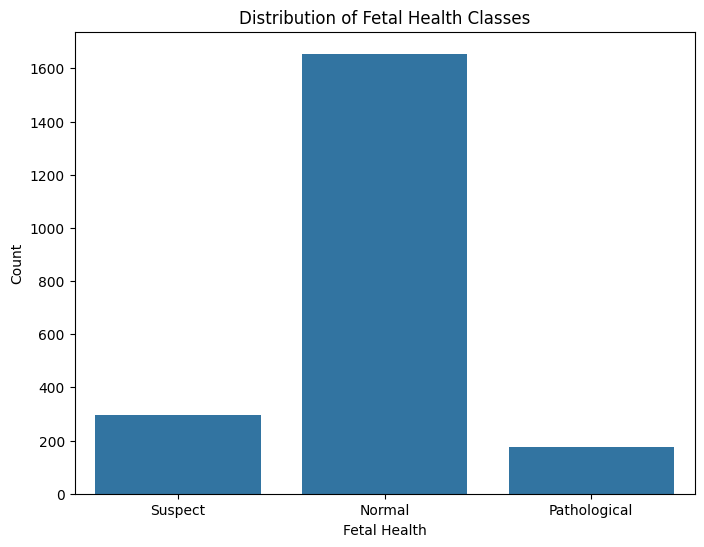

In [9]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Map the numerical labels to descriptive class names for clarity
# 1.0: Normal, 2.0: Suspect, 3.0: Pathological
df['fetal_health'] = df['fetal_health'].map({1.0: 'Normal', 2.0: 'Suspect', 3.0: 'Pathological'})
print("\nValue counts for 'fetal_health' after mapping:")
print(df['fetal_health'].value_counts())

# Visualize the distribution of the target variable to check for class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=df)
plt.title('Distribution of Fetal Health Classes')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

In [10]:
# Separate features (X) and target (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Split the dataset into training (80%) and testing (20%) sets as required
# The 'stratify' parameter ensures that the proportion of each class is the same in both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Standardize the features
# Standardizing features is important for many machine learning models as it scales them to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: 1700 samples
Testing set size: 426 samples


In [11]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("Random Forest Classifier model trained successfully.")

Random Forest Classifier model trained successfully.



Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       332
Pathological       0.94      0.94      0.94        35
     Suspect       0.87      0.76      0.81        59

    accuracy                           0.95       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426



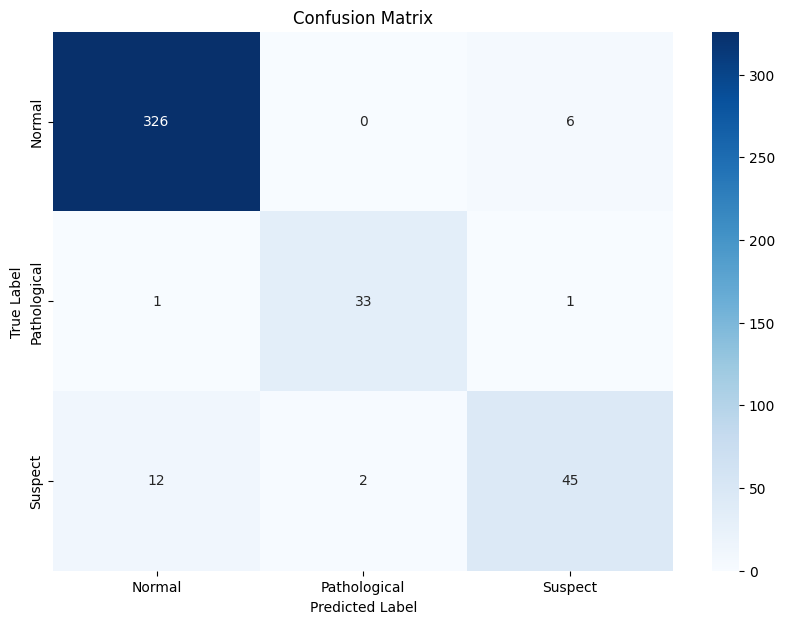

In [12]:
# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Provide performance evaluation with a Classification Report
# The classification report provides key metrics: precision, recall, f1-score, and support for each class.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Provide performance evaluation with a Confusion Matrix
# The confusion matrix visually represents the performance of the model, showing correct and incorrect predictions for each class.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()